<a href="https://colab.research.google.com/github/Bira0/GroupB/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context:

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.



#Getting the Data


Sourced from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [1]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Load the dataset
csv_path = os.path.join(path, "creditcard.csv")
credB = pd.read_csv(csv_path)

credB

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#Exploration

Dataset General Information

In [3]:
credB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Changing the data type of our features from float64 to float32 to conserve memory and speedup training time.

In [4]:
float_col = credB.select_dtypes(include=['float64']).columns
credB[float_col] = credB[float_col].astype('float32')
credB['Class'] = credB['Class'].astype('int32')

In [5]:
credB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

Summary statistics

In [6]:
credB.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.867188,1.339397e-08,0.000000,-4.800400e-08,6.643411e-09,2.657364e-08,-1.500125e-09,-1.071518e-09,-1.071518e-10,-3.214554e-10,...,-1.928732e-09,3.643161e-09,3.214554e-10,1.259033e-09,2.143036e-09,1.034684e-09,1.138488e-10,-1.272427e-10,88.349609,0.001727
std,47487.195312,1.958611e+00,1.651183,1.516203e+00,1.415832e+00,1.380180e+00,1.332214e+00,1.237020e+00,1.194202e+00,1.098575e+00,...,7.344701e-01,7.256873e-01,6.244100e-01,6.056016e-01,5.212620e-01,4.822155e-01,4.035722e-01,3.300574e-01,250.071564,0.041527
min,0.000000,-5.640751e+01,-72.715729,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-0.598550,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,0.065486,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097605e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,0.803724,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273458e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165001,0.000000
max,172792.000000,2.454930e+00,22.057730,9.382559e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519588e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160156,1.000000


Rounding the mean of V1-V28 == 0, Which confirms the claim of the original poster of the dataset.

V1-V28 Are the principle components obtained with PCA, so no need to scale them.

In [7]:
credB[['V1', 'V2', 'V3']].describe().round(3)

,V1,V2,V3
count,284807.000,284807.000,284807.000
mean,0.000,0.000,-0.000
std,1.959,1.651,1.516
min,-56.408,-72.716,-48.326
25%,-0.920,-0.599,-0.890
50%,0.018,0.065,0.180
75%,1.316,0.804,1.027
max,2.455,22.058,9.383


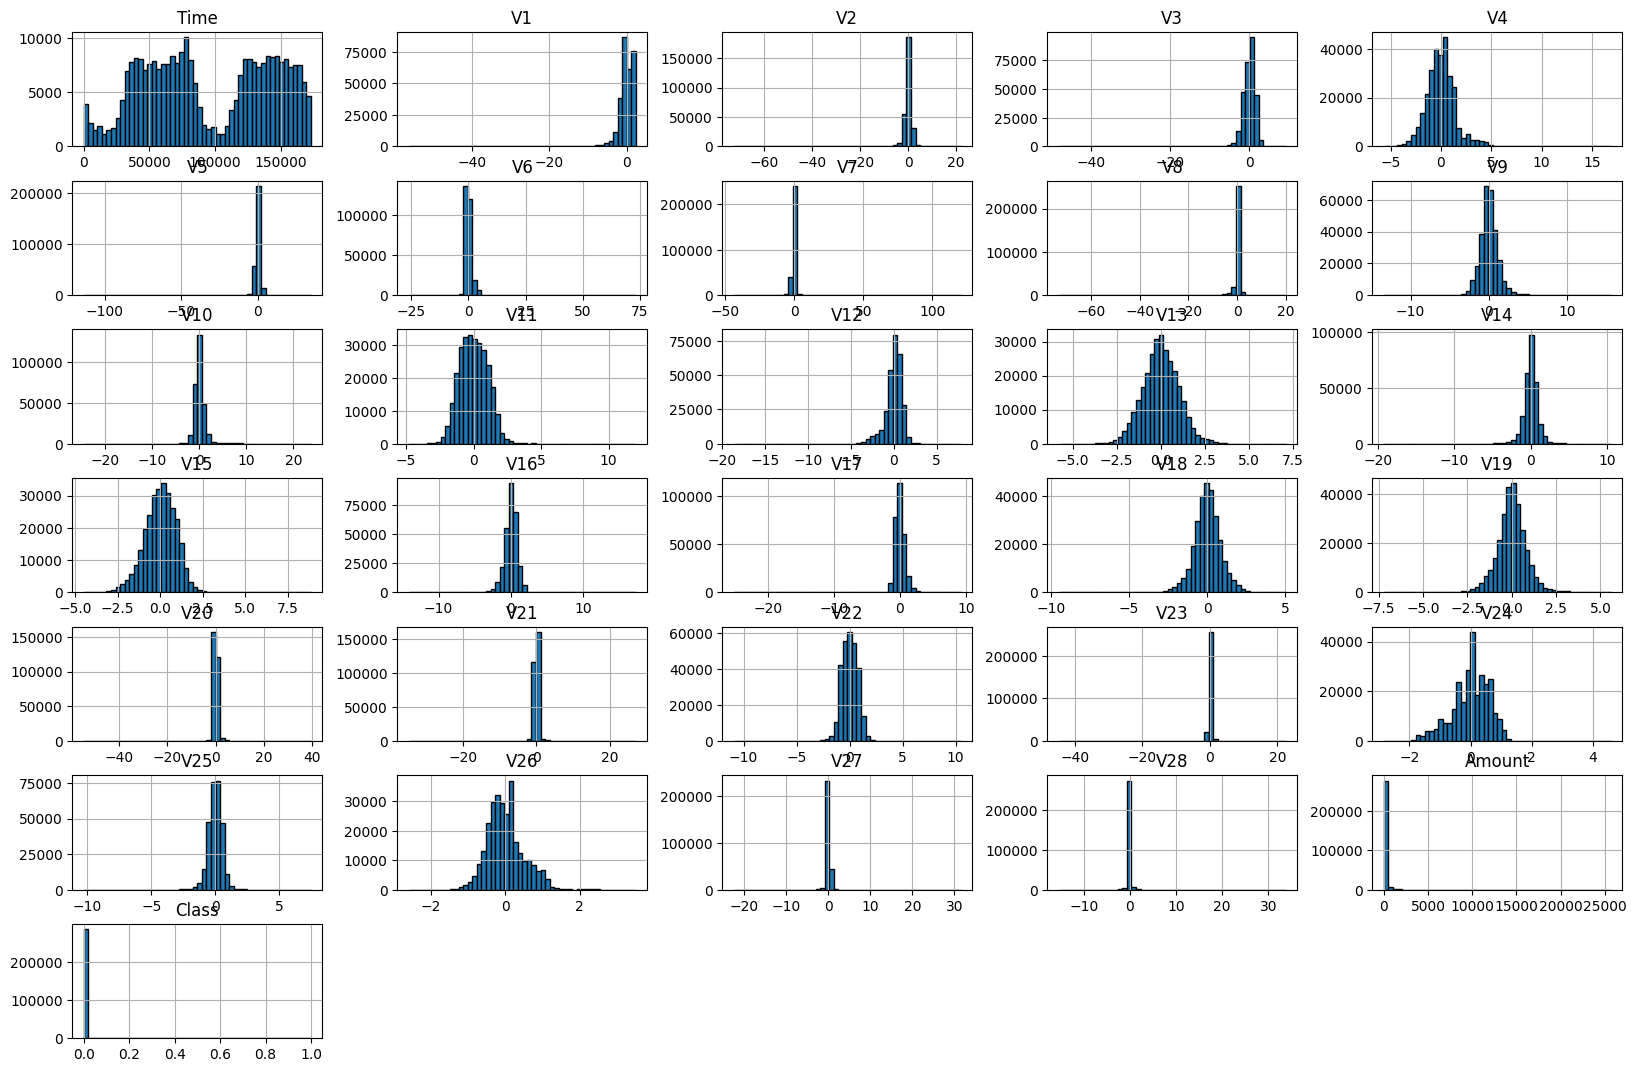

In [8]:
credB.hist(figsize=(20, 15), bins=50, layout=(8, 5), edgecolor='black')
plt.show()


See if NULL values exist

In [9]:
null_values = credB.isnull().sum()
null_values[null_values > 0]

,0


# Preprocessing

Splitting the data

In [10]:
from sklearn.model_selection import train_test_split
X = credB.drop('Class', axis=1)
y = credB['Class']




*   Since 'V1 - V28' had PCA done on them
There's no sense in scaling them.

*   Using boxplot on 'Amount', 'Time' to identify if they have any outliers, to choose which scaler to use on them.


Feature Engineering

Taking the log1p of 'Amount ' because of it's large values and to reduce the skewness

In [11]:
X['LogAmount'] = np.log1p(X['Amount'])
X = X.drop('Amount', axis=1)

Creating feature 'Hour' to move away from 'Time' cont values 0-172k
and capture time of day patterns of fraud.

Since the dataset spans 2 days, we assume that the recording of the entries started at the start of the first day.

In [12]:
X['Hour'] = (X['Time'] // 3600) % 24
X = X.drop('Time', axis=1)

<Axes: >

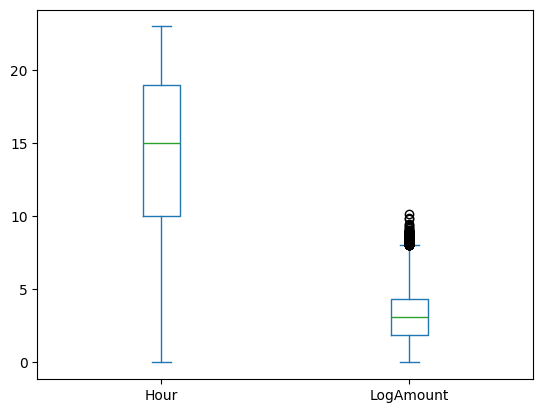

In [13]:
X[['Hour', 'LogAmount']].plot(kind='box')


*  Time has no outliers BUT it's range is huge, using RobustScaler next.
*   LogAmount has a ton of outliers, using RobustScaler next.




Scaling Amount using RobustScaler

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_without_scaling = X.copy()

X[['Hour', 'LogAmount']] = ss.fit_transform(X[['Hour', 'LogAmount']])



<Axes: >

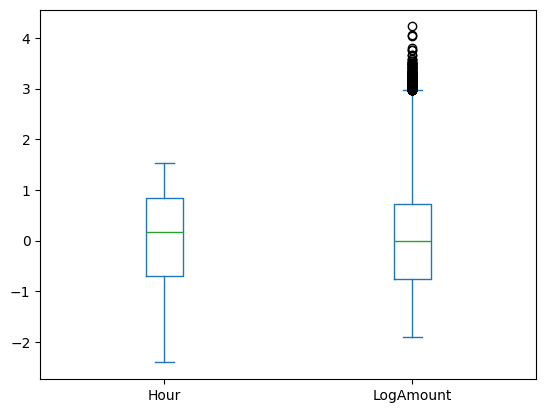

In [15]:
X[['Hour', 'LogAmount']].plot(kind='box')

## PCA

PCA

Choosing the appropriate number of components using this FOR loop that preserves 90% Variance

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
sum_variance = np.cumsum(pca.explained_variance_ratio_)

count = 0
for i in sum_variance:
  count += 1

  if i >= 0.95:
    break

print(count)

24


Using np.cumsum(pca.explained_variance_ratio_)
computes the cumulative proportion of variance explained by the principal components, that allows us to determine how many components are needed to retain/preserve **0.95 Variance**

In [17]:
X.shape

(284807, 30)

In [18]:
sum_variance

array([0.11769731, 0.21010059, 0.2804097 , 0.34189063, 0.40312707,
       0.4579879 , 0.5051847 , 0.55179214, 0.59522426, 0.6315162 ,
       0.6673335 , 0.69918877, 0.7295079 , 0.7579497 , 0.784172  ,
       0.8083747 , 0.8305693 , 0.85219765, 0.8725301 , 0.89242125,
       0.9093142 , 0.9254895 , 0.9402685 , 0.953356  , 0.9651403 ,
       0.9763193 , 0.98462033, 0.9917197 , 0.99667174, 1.0000001 ],
      dtype=float32)

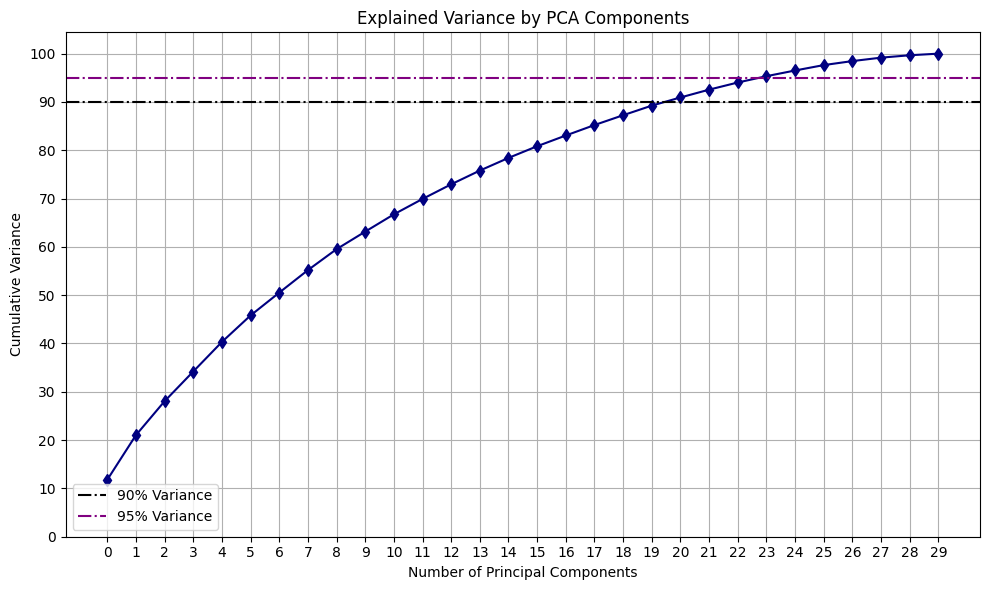

In [19]:
plt.figure(figsize=(10, 6))
plt.plot((sum_variance)*100, marker='d', color='navy')
plt.axhline(y=90, color='black', linestyle='-.', label='90% Variance')
plt.axhline(y=95, color='purple', linestyle='-.', label='95% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(np.arange(30))
plt.yticks(np.arange(0, 110, 10))
plt.show()


* Using pca.explained_variance_ratio_
and np.cumsum we'd get an array filled with the cumulative explained variance.

* Plotting it against the number of components to use, we measure how many componenets to use in our 'PCA' modelling or 'Reducing the dimensions', which landed at 20 components.

Applying 'Count' or the sweet spot of number of components using PCA on the dataset

In [20]:
pcaCount = PCA(n_components=count)
X_pca = pcaCount.fit_transform(X)

X_pca.shape

(284807, 24)

Dimensions getting reduced to 20

In [ ]:
!pip install plotly

import plotly.express as px
import pandas as pd


fig = px.scatter_3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    opacity=0.6,
    color_discrete_sequence=['navy']
)

fig.update_traces(marker=dict(size=2))
fig.update_layout(title='3D PCA Visualization')
fig.show()


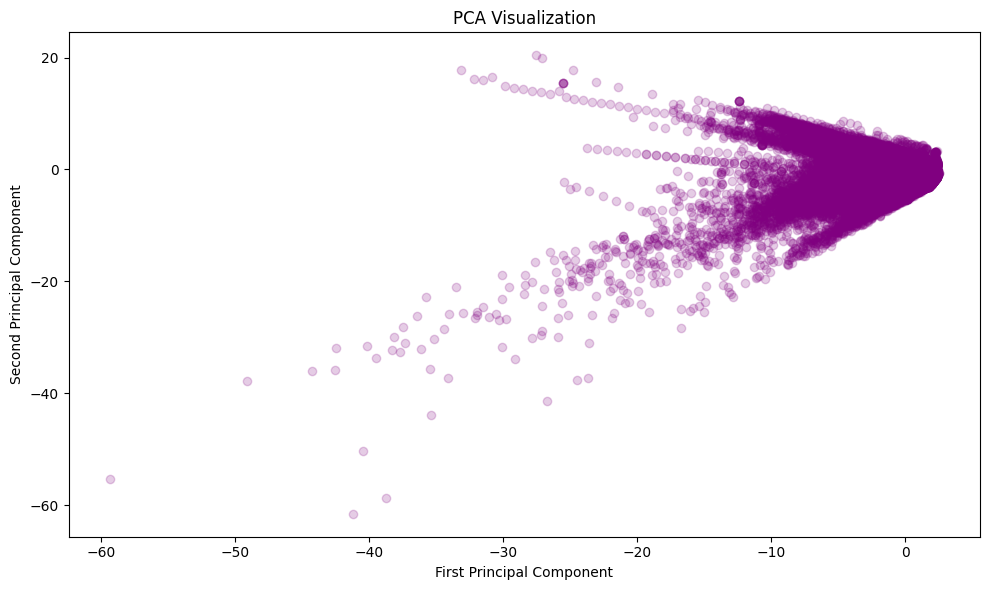

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2, c='purple')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization')
#plt.xticks(np.arange(-60, 61, 10))
#plt.yticks(np.arange(-60, 61, 10))
plt.tight_layout()
plt.show()

# TSNE


In [22]:
!pip install -q cuml-cuda11x cudf-cuda11x

ERROR: Could not find a version that satisfies the requirement cuml-cuda11x (from versions: none)
ERROR: No matching distribution found for cuml-cuda11x


In [ ]:
tsne = cuTSNE(
    n_components=2,
    perplexity=30,
    early_exaggeration=8,
    learning_rate=2000,
    n_iter=1000,
    init="pca",
    random_state=42,
    verbose=True
)

In [46]:
import cudf
from cuml.manifold import TSNE as cuTSNE

#cuDf check what it is
gdf = cudf.DataFrame(X_pca)

tsne = cuTSNE(
    n_components=2,
    perplexity=30,
    early_exaggeration=6,
    learning_rate=500,
    n_iter=1000,
    init="pca",
    random_state=42,
    verbose=True
)

X_tsne = tsne.fit_transform(gdf).to_numpy()


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


[2025-05-13 15:48:32.102] [CUML] [debug] Learning rate is adaptive. In TSNE paper, it has been shown that as n->inf, Barnes Hut works well if n_neighbors->30, learning_rate->20000, early_exaggeration->24.
[2025-05-13 15:48:32.102] [CUML] [debug] cuML uses an adpative method.n_neighbors decreases to 30 as n->inf. Likewise for the other params.
[2025-05-13 15:48:32.102] [CUML] [debug] New n_neighbors = 30, learning_rate = 94935.66666666667, exaggeration = 24.0
[2025-05-13 15:48:32.102] [CUML] [debug] Data size = (284807, 24) with dim = 2 perplexity = 30.000000
[2025-05-13 15:48:32.102] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[2025-05-13 15:48:32.125] [CUML] [debug] Getting distances.
[2025-05-13 15:48:37.649] [CUML] [debug] Now normalizing distances so exp(D) doesn't explode.
[2025-05-13 15:48:37.651] [CUML] [debug] Searching for optimal perplexity via bisection search.
[2025-05-13 15:48:42.566] [CUML] [debug] [t-S

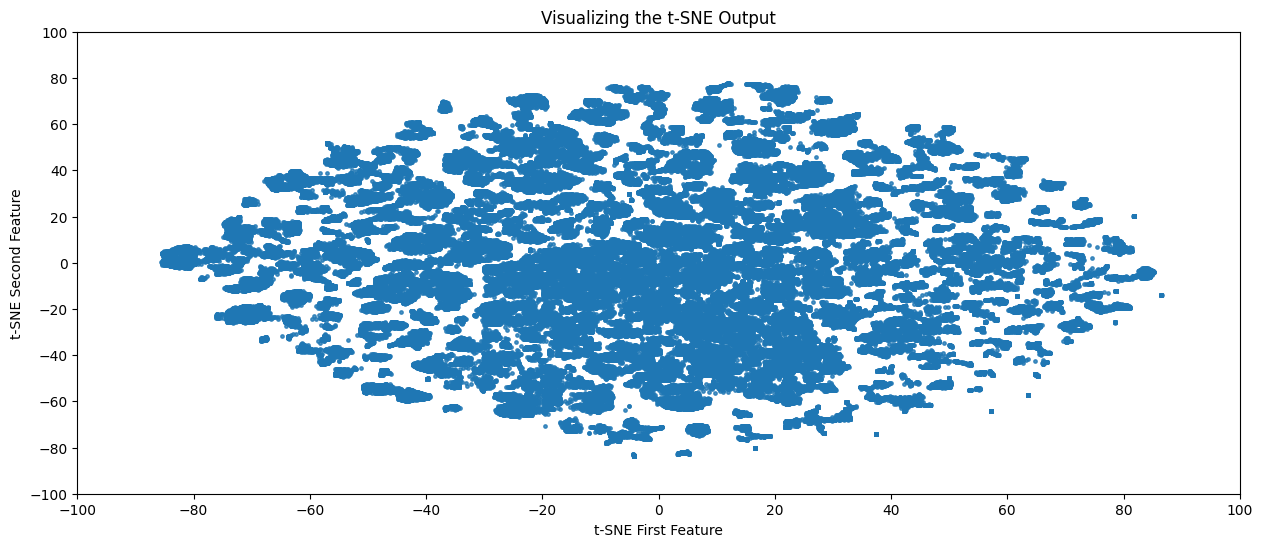

In [52]:
plt.figure(figsize=(15, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=6, alpha=0.8)

plt.title("Visualizing the t-SNE Output")
plt.xlabel("t-SNE First Feature")
plt.ylabel("t-SNE Second Feature")
plt.xticks(np.arange(-100, 101, 20))
plt.yticks(np.arange(-100, 101, 20))
#plt.grid(True)
plt.show()

Applying GPU-accelerated t-SNE to PCA reduced data:
* to compress the data further into two dimensions
* and Visualize underlying structure and patterns more clearly.

* The t-SNE plot reveals a clear distribution of clusters, indicating that the PCA reduced data preserved meaningful structure from the original space(Variance).  

* The dense center indicates a high concentration of similar samples, while the spread at the edges may reflect distinct subgroups or outliers.

# Clustering

## K-Means

Applying KMeans clustering to the PCA transformed data to identify natural groupings based on distance.

* Using a for loop to find the 'Inertia' & 'Silhoette' scores at clusters (2-20)

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
Ks = range(2, 21)
for k in Ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42, init='random')
    kmeans.fit(X_pca)


    inertias.append(kmeans.inertia_)
    sil = silhouette_score(X_pca, kmeans.labels_, sample_size=10000, random_state=42)
    sil_scores.append(sil)
    print(f"k={k}, inertia={kmeans.inertia_:.2f}, silhouette={sil:.3f}")


k=2, inertia=8119893.00, silhouette=0.105
k=3, inertia=7688702.00, silhouette=0.107
k=4, inertia=7349927.50, silhouette=0.117
k=5, inertia=7018738.00, silhouette=0.117
k=6, inertia=6702652.00, silhouette=0.127
k=7, inertia=6466893.00, silhouette=0.106
k=8, inertia=6274713.00, silhouette=0.112
k=9, inertia=6062923.00, silhouette=0.120
k=10, inertia=5866637.00, silhouette=0.115
k=11, inertia=5778637.50, silhouette=0.097
k=12, inertia=5602774.00, silhouette=0.091
k=13, inertia=5483772.00, silhouette=0.101
k=14, inertia=5372630.00, silhouette=0.093
k=15, inertia=5316585.00, silhouette=0.083
k=16, inertia=5187912.00, silhouette=0.091
k=17, inertia=5147902.50, silhouette=0.098
k=18, inertia=4978269.50, silhouette=0.100
k=19, inertia=4842906.00, silhouette=0.085
k=20, inertia=4734525.00, silhouette=0.098


Elbow for K-Means

Using 'KneeLocator' from kneed to automatically identify the optimal number of clusters to use.

* KneeLocator works by analyzing the curvature of the intertia plot to locate the point of maximum inflection, known as the "Elbow", where the rate of improvement sharply decreases.

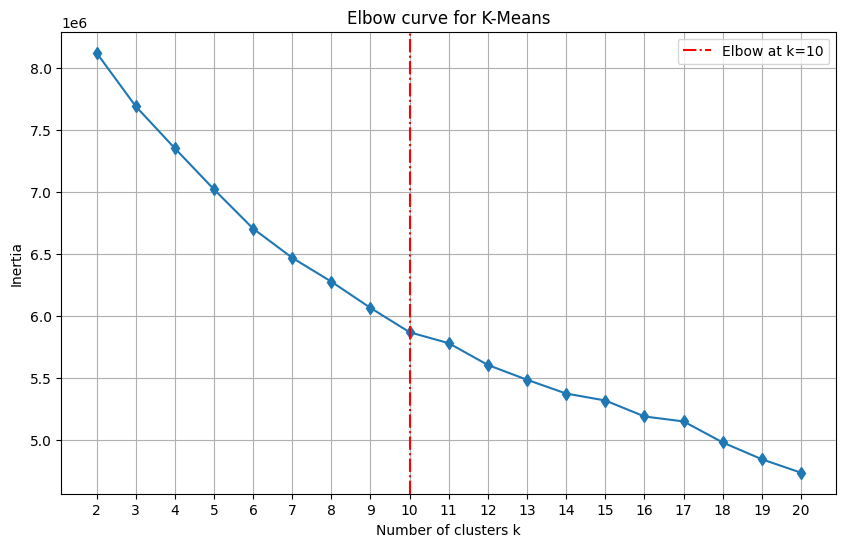

In [54]:
!pip install kneed
from kneed import KneeLocator
kl = KneeLocator(Ks, inertias, curve="convex", direction="decreasing")
elbowK = kl.elbow

plt.figure(figsize=(10, 6))
plt.plot(Ks, inertias, marker='d')
plt.axvline(x=elbowK, color='red', linestyle='-.', label=f'Elbow at k={elbowK}')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow curve for K-Means')
plt.xticks(np.arange(2, 21, 1))
plt.legend()
plt.grid(True)
plt.show()

Silhouette for K-Means

Visualizing the silhouette scores across different cluster 'K' counts to find the best K that balances compactness, which is always, according to the plot, the highest point or the highest score.

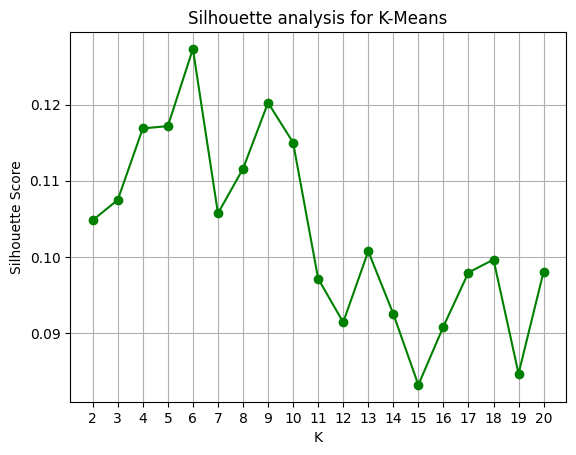

In [57]:
plt.figure()
plt.plot(Ks, sil_scores, marker='o', c='green')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette analysis for K-Means')
plt.xticks(Ks)
plt.grid(True)
plt.show()

According to the figure, k = 6 is the best cluster for cohesion and separations while 9 is second best (better compactness).

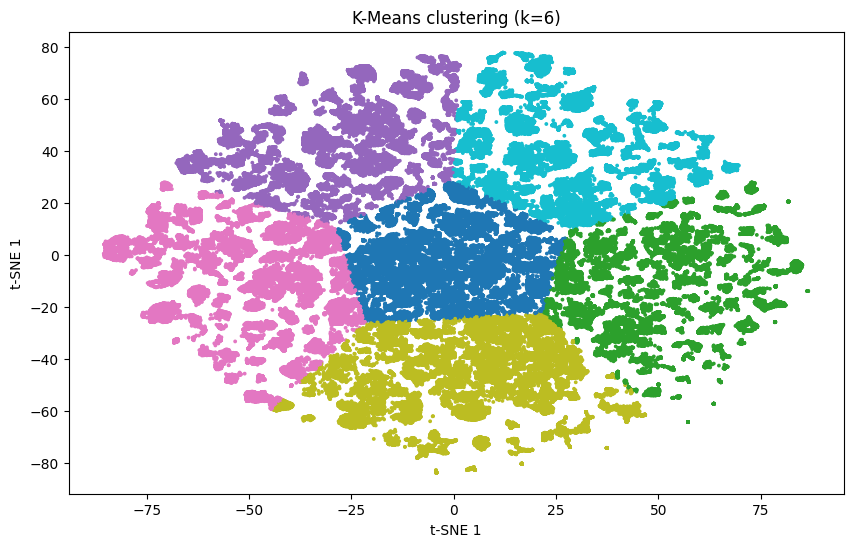

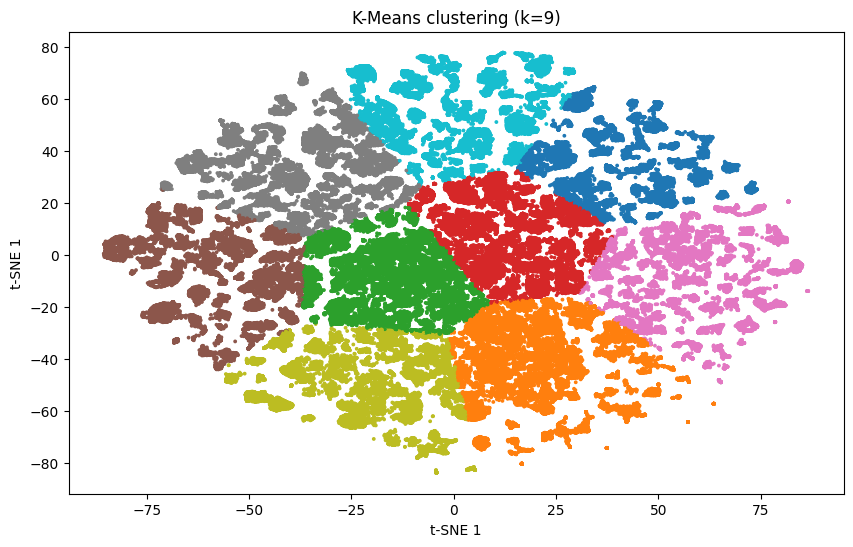

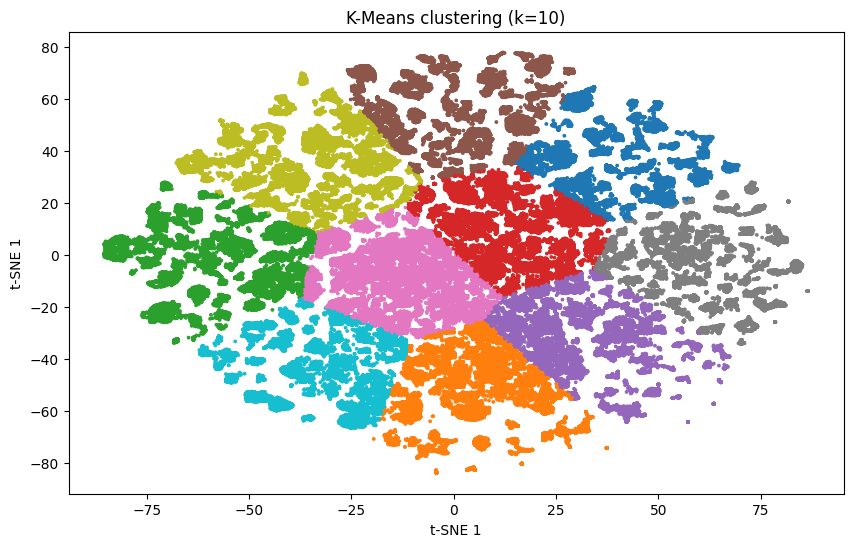

In [58]:
for k in [6, 9, 10]:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_tsne)
    plt.figure(figsize=(10,6))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='tab10', s=3)
    plt.title(f'K-Means clustering (k={k})')
    plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 1')
    plt.show()


## KMeans++

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
Ks = range(2, 21)
for k in Ks:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_pca)


    inertias.append(kmeans.inertia_)
    sil = silhouette_score(X_pca, kmeans.labels_, sample_size=10000, random_state=42)
    sil_scores.append(sil)
    print(f"k={k}, inertia={kmeans.inertia_:.2f}, silhouette={sil:.3f}")


k=2, inertia=8119894.00, silhouette=0.105
k=3, inertia=7688702.00, silhouette=0.107
k=4, inertia=7320607.50, silhouette=0.109
k=5, inertia=6985995.00, silhouette=0.120
k=6, inertia=6739342.00, silhouette=0.099
k=7, inertia=6512672.50, silhouette=0.104
k=8, inertia=6274323.50, silhouette=0.106
k=9, inertia=6025624.00, silhouette=0.113
k=10, inertia=5837818.00, silhouette=0.114
k=11, inertia=5726178.50, silhouette=0.088
k=12, inertia=5552425.50, silhouette=0.090
k=13, inertia=5345546.00, silhouette=0.099
k=14, inertia=5231420.50, silhouette=0.100
k=15, inertia=5121687.50, silhouette=0.094
k=16, inertia=4998490.50, silhouette=0.097
k=17, inertia=4913200.50, silhouette=0.099
k=18, inertia=4865124.50, silhouette=0.095
k=19, inertia=4765022.50, silhouette=0.092
k=20, inertia=4699382.00, silhouette=0.100


Elbow for K-Means++

Again we use the KneeLocator to determine the best K cluster number that provides the best compactness

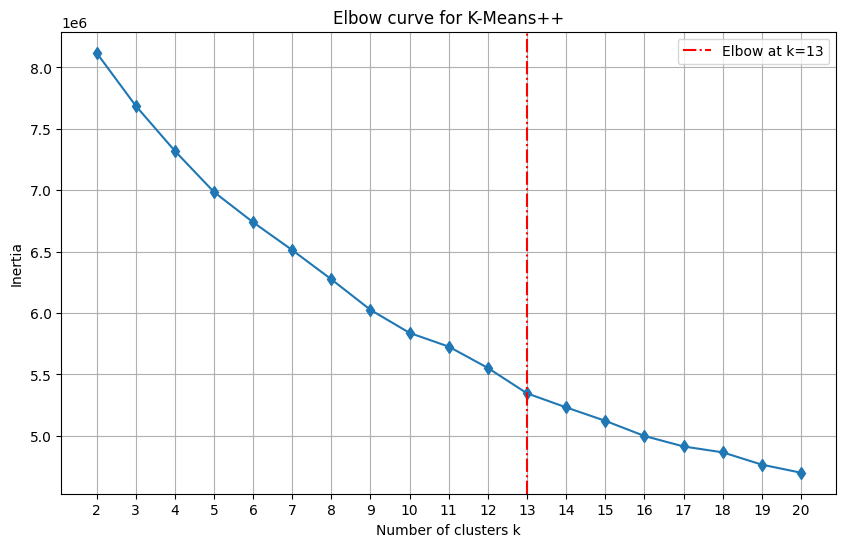

In [60]:
kl = KneeLocator(Ks, inertias, curve="convex", direction="decreasing")
elbowK = kl.elbow

plt.figure(figsize=(10, 6))
plt.plot(Ks, inertias, marker='d')
plt.axvline(x=elbowK, color='red', linestyle='-.', label=f'Elbow at k={elbowK}')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow curve for K-Means++')
plt.xticks(np.arange(2, 21, 1))
plt.legend()
plt.grid(True)
plt.show()

Best compactness at K = 12 according to the KneeLocator or Elbow

Silhouette for K-Means++

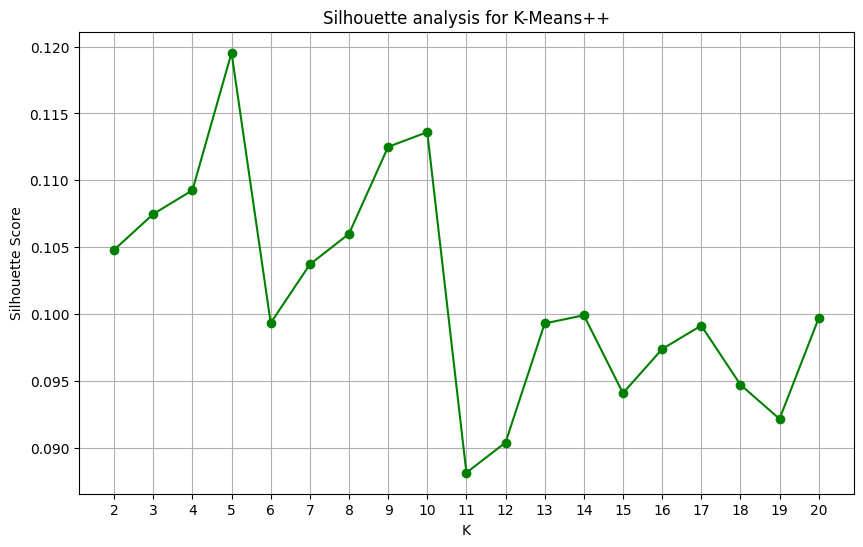

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(Ks, sil_scores, marker='o', c='green')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette analysis for K-Means++')
plt.xticks(Ks)
plt.grid(True)
plt.show()


Silhouette score reveals that 5 & 10 are our best options for cohesion and separation.

Plotting the best scores from Silhouette score and Elbow method

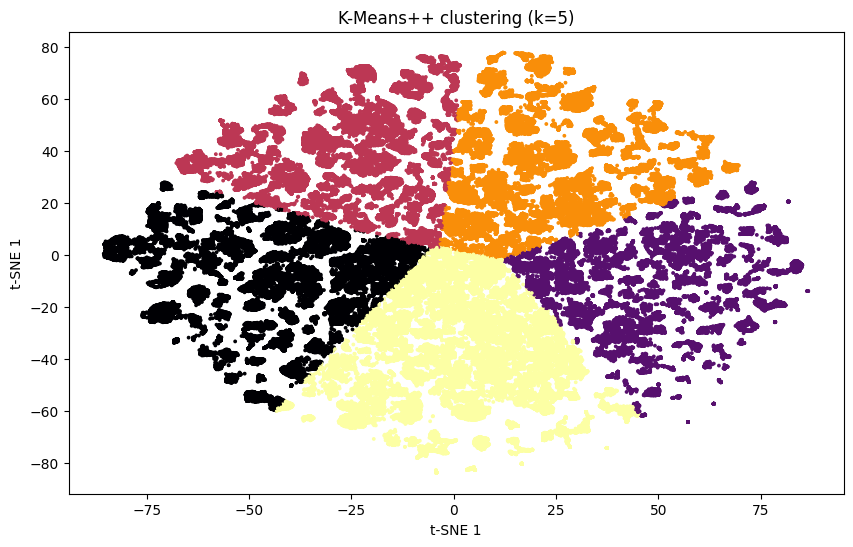

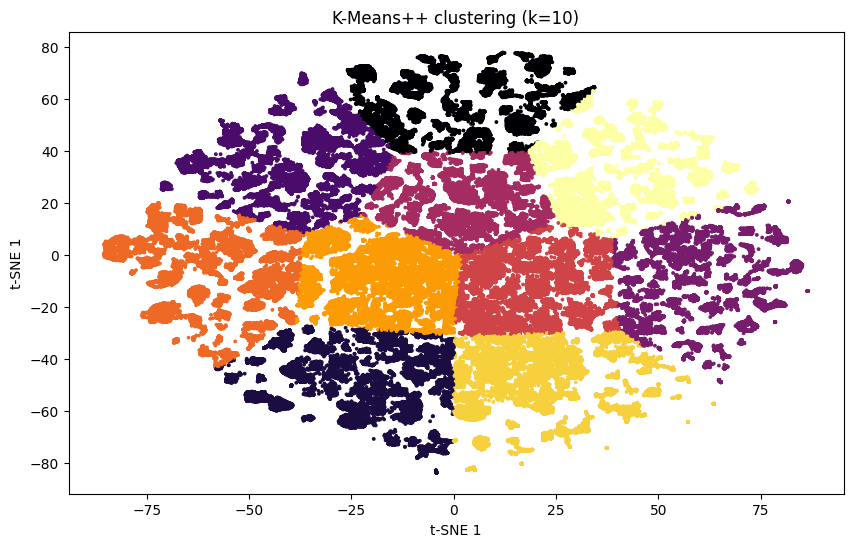

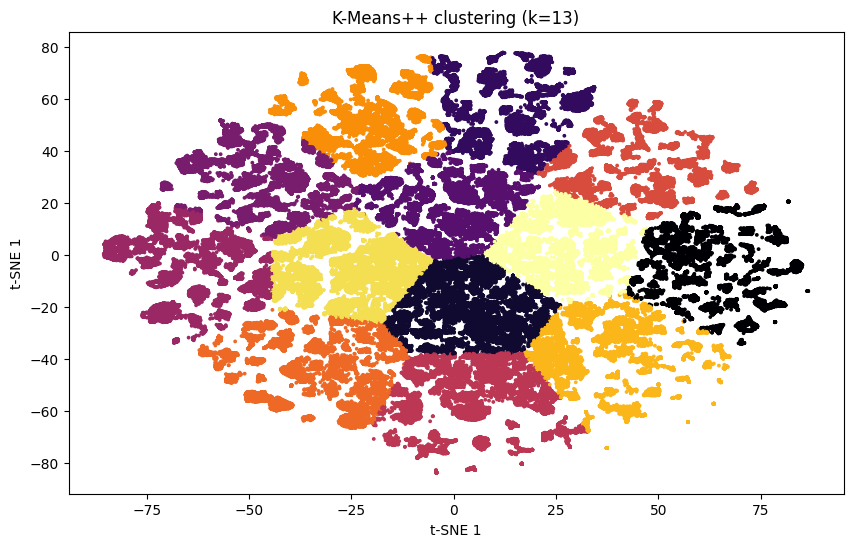

In [64]:
for k in [5, 10, 13]:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_tsne)
    plt.figure(figsize=(10,6))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='inferno', s=3)
    plt.title(f'K-Means++ clustering (k={k})')
    plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 1')
    plt.show()

***The performance of the two K-Means initialization strategies***

'K-Means' and 'K-Means++'

---
We compare two initialization strategies used in KMeans clustering

The standard random method and the more refined K-Means++. To do this, the function kmeansVSplusplsu(), takes the init method as input, fits a KMeans model with K = 10 on the PCA transformed data, and returns a range of performance metrics. These include:


* Inertia
* Silhouette score
* Calinski-Harabasz score
* Davies-Bouldin score
* Runtime
* Number of iterations until convergence
---



In [65]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


k = 10
sample_size = 10000


def kmeansVSplusplus(init_method):
    km = KMeans(n_clusters=k, init=init_method, n_init=10, random_state=42)
    start = time.time()
    km.fit(X_pca)
    runtime = time.time() - start

    labels = km.labels_
    inertia = km.inertia_
    silhouette = silhouette_score(X_pca, labels, sample_size=sample_size, random_state=42)
    ch_score = calinski_harabasz_score(X_pca, labels)
    db_score = davies_bouldin_score(X_pca, labels)
    iterations = km.n_iter_

    return {
      'init': init_method,
      'runtime_sec': runtime,
      'inertia': inertia,
      'silhouette': silhouette,
      'calinski_harabasz': ch_score,
      'davies_bouldin': db_score,
      'n_iter': iterations
    }

#KMeans, KMeans++
results_random = kmeansVSplusplus('random')
results_plus   = kmeansVSplusplus('k-means++')

#Printing
for res in (results_random, results_plus):
    print(f"----- KMeans init='{res['init']}' -----")
    print(f"Runtime (s)            : {res['runtime_sec']:.2f}")
    print(f"Inertia                : {res['inertia']:.2f}")
    print(f"Silhouette (sampled)   : {res['silhouette']:.2f}")
    print(f"Calinski–Harabasz      : {res['calinski_harabasz']:.2f}")
    print(f"Davies–Bouldin         : {res['davies_bouldin']:.2f}")
    print(f"Iterations to converge : {res['n_iter']}")

----- KMeans init='random' -----
Runtime (s)            : 1.67
Inertia                : 5866637.00
Silhouette (sampled)   : 0.12
Calinski–Harabasz      : 16293.76
Davies–Bouldin         : 1.93
Iterations to converge : 98
----- KMeans init='k-means++' -----
Runtime (s)            : 5.18
Inertia                : 5837817.50
Silhouette (sampled)   : 0.11
Calinski–Harabasz      : 16530.34
Davies–Bouldin         : 1.89
Iterations to converge : 64


We compare both initializations acrosss:
* **Inertia:** Quantifies compactness of clusters.
* **Silhouette score:** balances cohesion and separation of clusters, the larger the value the better(closer to +1).
* **Calinski-Harabasz:** The larger the value the better, it indicates clusters that are both tight and well separated.
* **Davies-Bouldin:** The lower the value the better, (penalizes clusters that are wide and too close to each other) Lower DB means clusters are compact and far apart.
* **Runtime:** The smaller the better (Faster model fitting).
* **Iterations:** Fewer is better, shows that that model reached stability more efficently.

*The k-means++ initialization, while slightly slower, resulted in better clustering performance overall — with lower inertia, higher Calinski–Harabasz score, lower Davies–Bouldin index, and fewer iterations to converge — indicating more compact, well-separated clusters and faster convergence.*

## Mini-Batch K-Means

In [66]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
Ks = range(2, 21)
for k in Ks:
    mbkm = MiniBatchKMeans(n_clusters=k, batch_size=1000, n_init=10, random_state=42)
    mbkm.fit(X_pca)


    inertias.append(mbkm.inertia_)
    sil = silhouette_score(X_pca, mbkm.labels_, sample_size=10000, random_state=42)
    sil_scores.append(sil)
    print(f"k={k}, inertia={mbkm.inertia_:.2f}, silhouette={sil:.3f}")


k=2, inertia=8122952.50, silhouette=0.105
k=3, inertia=8197266.50, silhouette=0.052
k=4, inertia=7489516.50, silhouette=0.119
k=5, inertia=7331652.00, silhouette=0.078
k=6, inertia=7120749.50, silhouette=0.059
k=7, inertia=6969483.00, silhouette=0.049
k=8, inertia=6687954.00, silhouette=0.075
k=9, inertia=6324231.50, silhouette=0.062
k=10, inertia=6107374.50, silhouette=0.078
k=11, inertia=5994230.50, silhouette=0.105
k=12, inertia=6058888.00, silhouette=0.064
k=13, inertia=5566732.50, silhouette=0.085
k=14, inertia=5639123.50, silhouette=0.071
k=15, inertia=5507391.50, silhouette=0.098
k=16, inertia=5314251.00, silhouette=0.076
k=17, inertia=5426028.50, silhouette=0.061
k=18, inertia=5207144.50, silhouette=0.087
k=19, inertia=5184717.00, silhouette=0.070
k=20, inertia=5012556.00, silhouette=0.070


Elbow viz for Mini-Batch K-Means

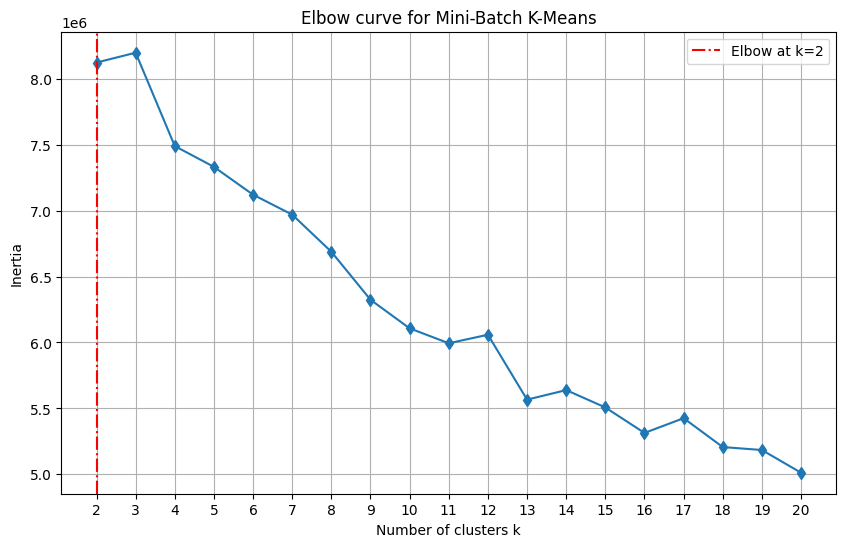

In [67]:
kl = KneeLocator(Ks, inertias, curve="convex", direction="decreasing")
elbowK = kl.elbow

plt.figure(figsize=(10, 6))
plt.plot(Ks, inertias, marker='d')
plt.axvline(x=elbowK, color='red', linestyle='-.', label=f'Elbow at k={elbowK}')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow curve for Mini-Batch K-Means')
plt.xticks(np.arange(2, 21, 1))
plt.legend()
plt.grid(True)
plt.show()

Best compactness at k = 2

Silhouette viz for Mini-Batch K-Means

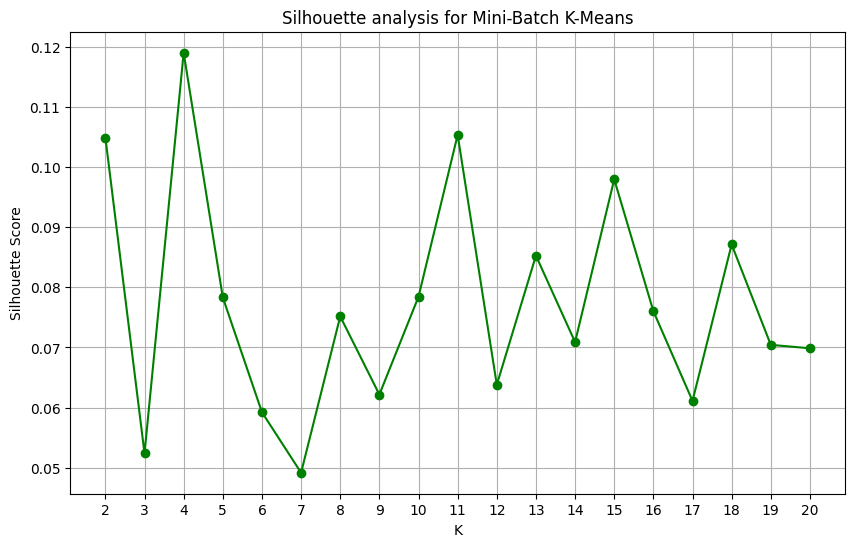

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(Ks, sil_scores, marker='o', c='green')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette analysis for Mini-Batch K-Means')
plt.xticks(Ks)
plt.grid(True)
plt.show()


Best cohesion & separation at 4

second best equally at k = 2 or 11

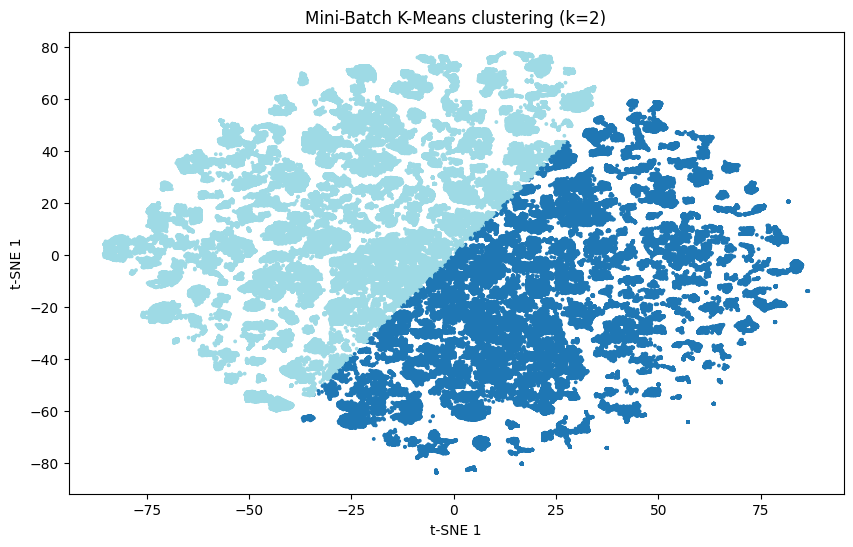

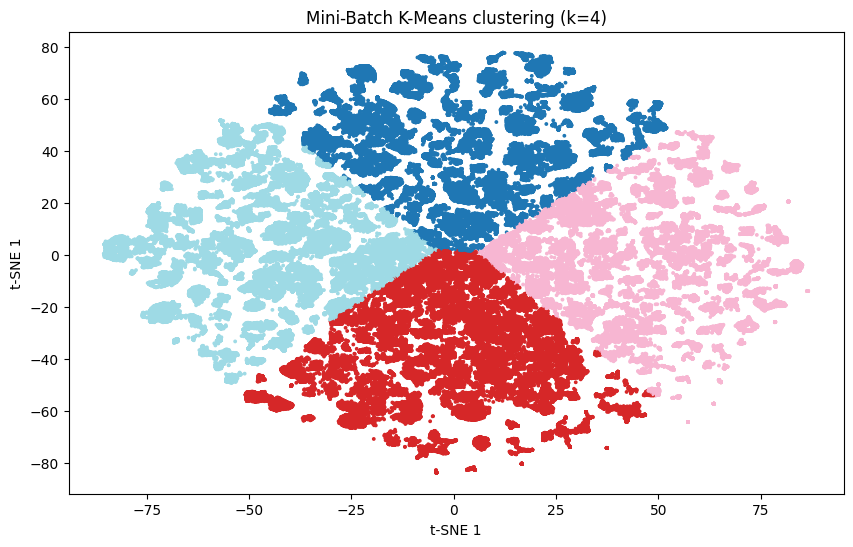

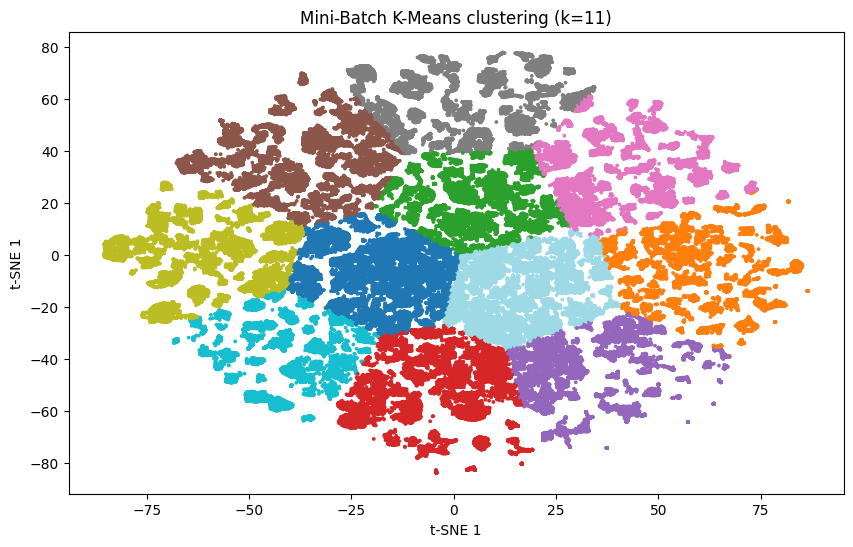

In [73]:
for k in [2, 4, 11]:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_tsne)
    plt.figure(figsize=(10,6))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='tab20', s=3)
    plt.title(f'Mini-Batch K-Means clustering (k={k})')
    plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 1')
    plt.show()

***'Random' or K-Means VS Mini-Batch K-Means***


---
We compare the performance of standard K-Means and MiniBatchKMeans clustering algorithms on our PCA-transformed data. Evaluatiing each method using key clustering metrics such as inertia, silhouette score, runtime, and the number of iterations to converge, all at a fixed number of clusters (K=11).

The goal is to assess the trade-offs between computational efficiency and clustering quality when working with large datasets.


---



In [76]:
import time
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

#K-Means
start = time.time()
km = KMeans(n_clusters=4, init='random', n_init=10, random_state=42)
km.fit(X_pca)
time_km = time.time() - start

labels_km = km.labels_
iters_km = km.n_iter_
inertia_km = km.inertia_
sil_km = silhouette_score(X_pca, labels_km, random_state=42, sample_size=10000)

print("K-Means:")
print(f"Runtime (s):           {time_km:.2f}")
print(f"Iterations to converge:{iters_km}")
print(f"Inertia:               {inertia_km:.2f}")
print(f"Silhouette:            {sil_km:.3f}\n")

#MiniBatch
start = time.time()
mbkm = MiniBatchKMeans(n_clusters=4, batch_size=1000, n_init=10, random_state=42)
mbkm.fit(X_pca)
time_mb = time.time() - start

labels_mb = mbkm.labels_
iters_mb = mbkm.n_iter_
inertia_mb = mbkm.inertia_
sil_mb= silhouette_score(X_pca, labels_mb, sample_size=sample_size, random_state=42)

print("MiniBatchKMeans:")
print(f"Runtime (s):            {time_mb:.2f}")
print(f"Iterations to converge: {iters_mb}")
print(f"Inertia:                {inertia_mb:.2f}")
print(f"Silhouette:             {sil_mb:.3f}")

K-Means:
Runtime (s):           1.13
Iterations to converge:37
Inertia:               7349927.50
Silhouette:            0.117

MiniBatchKMeans:
Runtime (s):            0.11
Iterations to converge: 1
Inertia:                7489516.50
Silhouette:             0.119


The results show that MiniBatchKMeans significalntly outperforms K-Means in terms of runtime or speed, completing in just 0.09 seconds. However this speed comes at a slight cost: **K-Means achieved better clustering quality**, with a lower inertia (more compact clusters) and a higher silhoette score(0.128 vs 0.116), suggesting better separation between the clusters.



> Conclusion:

> K-Means is preferable for accuracy, while MiniBatchKMeans is more suitable for faster, Large-Scale applications where slight reductions in clustering quality are acceptable.



#DB TEST

In [51]:
#Sampling PCA data
from sklearn.utils import shuffle

X_sample = shuffle(X_pca, random_state=42)[:10000]

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid


# Define the parameter grid
param_grid = {
    'eps': np.arange(0.1, 5.1, 0.5),
    'min_samples': range(3, 51)
}

# Initialize best score tracker
best_score = -1
best_params = None

# Iterate over parameter combinations
for params in ParameterGrid(param_grid):
    db = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = db.fit_predict(X_sample)

    # Check if clustering is valid (more than 1 cluster, not all noise)
    if len(set(labels)) <= 1 or (set(labels) == {-1}):
        continue

    score = silhouette_score(X_sample, labels)

    if score > best_score:
        best_score = score
        best_params = params

# Print best result
print(f"Best Silhouette Score: {best_score:.3f}")
print(f"Best Parameters: eps = {best_params['eps']}, min_samples = {best_params['min_samples']}")


Best Silhouette Score: 0.563
Best Parameters: eps = 4.6, min_samples = 4


## DBscan

In [77]:
#Sampling PCA data
from sklearn.utils import shuffle

X_sample = shuffle(X_pca, random_state=42)[:10000]

In [81]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)


#Sort distances and plot
distances = np.sort(distances[:, 6])
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.ylabel("k-distance (5th NN)")
plt.title("Use the 'knee' as a suggested eps")
plt.grid(True)
plt.show()


IndexError: index 6 is out of bounds for axis 1 with size 5

In [82]:
distances = np.sort(distances[:, 5])
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.ylabel("k-distance (5th NN)")
plt.title("Use the 'knee' as a suggested eps")
plt.grid(True)
plt.show()

IndexError: index 5 is out of bounds for axis 1 with size 5

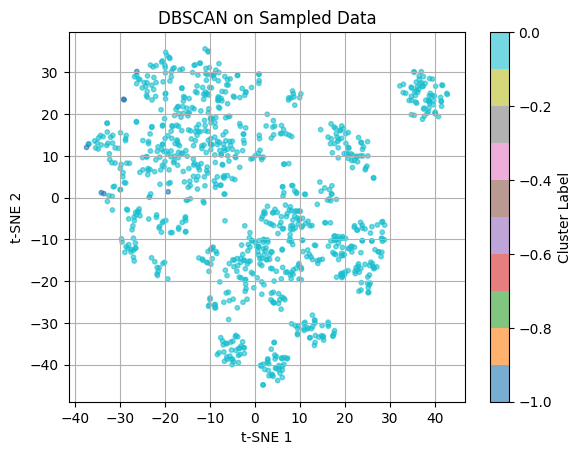

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=5, min_samples=5).fit(X_sample)

X_sample_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_sample)


plt.scatter(X_sample_tsne[:, 0], X_sample_tsne[:, 1], c=clustering.labels_, cmap='tab10', s=10, alpha=0.6)
plt.title("DBSCAN on Sampled Data")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()


In [54]:
from sklearn.metrics import silhouette_score

labels = clustering.labels_
if len(set(labels)) > 1 and -1 in labels:
    sil_score = silhouette_score(X_sample, labels)
    print(f'Silhouette Score: {sil_score:.3f}')


Silhouette Score: -0.261


Now cluster on all data

In [73]:
#Sampling PCA data
from sklearn.utils import shuffle
from sklearn.manifold import TSNE

X_sample = shuffle(X_pca, random_state=42)[:10000]

tsne = TSNE(n_components=2, random_state=42)
X_sample_tsne = tsne.fit_transform(X_sample)



Number of clusters found: 1
Number of noise points: 275
Silhouette Score: 0.595


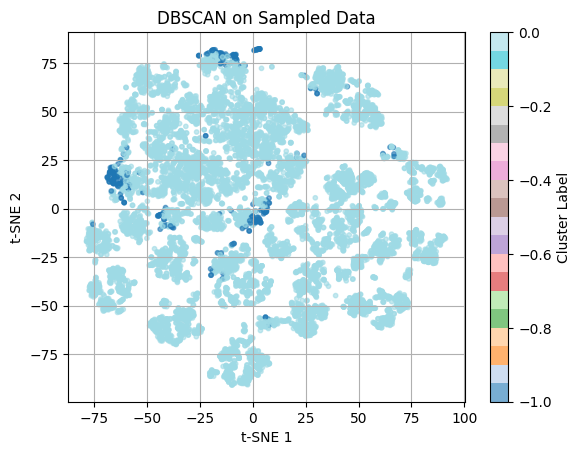

In [81]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score



clustering = DBSCAN(eps=5, min_samples=8, metric='euclidean', n_jobs=-1, algorithm='ball_tree').fit(X_sample)

labels = clustering.labels_
# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# Number of noise points
n_noise = np.sum(labels == -1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

sil_score = silhouette_score(X_sample, labels)
print(f'Silhouette Score: {sil_score:.3f}')

plt.scatter(X_sample_tsne[:, 0], X_sample_tsne[:, 1], c=clustering.labels_, cmap='tab20', s=10, alpha=0.6)
plt.title("DBSCAN on Sampled Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()


Nearest Neighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

#Build neighbor graph
neighbors = NearestNeighbors(radius=.5, algorithm='ball_tree', metric='euclidean', n_jobs=-1)
neighbors.fit(X_pca)


#sparse matrix of distances within the given radius
sparse_distance_matrix = neighbors.radius_neighbors_graph(X_pca, mode='connectivity')


db = DBSCAN(eps=5,
            min_samples=5,
            metric='precomputed',
            n_jobs=-1)

# Fit the model
labels = db.fit_predict(sparse_distance_matrix)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated clusters: {n_clusters}")
print(f"Noise points: {n_noise}")


plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, s=2, cmap='tab10')
plt.title("DBSCAN Clusters (Visualized with t-SNE)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid(True)
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-adde439679fe>", line 10, in <cell line: 0>
    sparse_distance_matrix = neighbors.radius_neighbors_graph(X_pca, mode='connectivity')
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py", line 1378, in radius_neighbors_graph
    A_ind = self.radius_neighbors(X, radius, return_distance=False)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py", line 1277, in radius_neighbors
    chunked_results = Parallel(n_jobs, prefer="threads")(
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 7

TypeError: object of type 'NoneType' has no len()

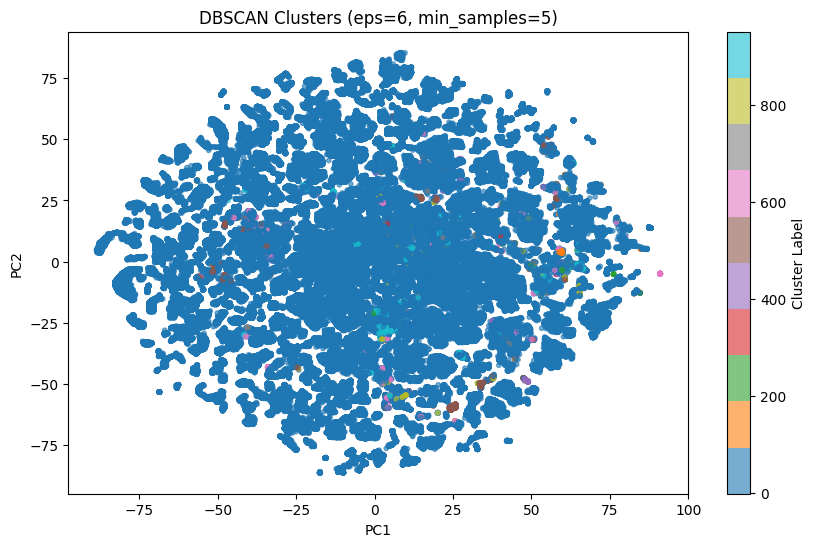

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clustering.labels_, cmap='tab10', s=10, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clusters (eps=6, min_samples=5)')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

labels = clustering.labels_
if len(set(labels)) > 1 and -1 in labels:
    sil_score = silhouette_score(X_pca, labels)
    print(f'Silhouette Score: {sil_score:.3f}')


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [26]:
labels = clustering.labels_

#Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

#Number of noise points
n_noise = np.sum(labels == -1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters found: 3039
Number of noise points: 63853
